In [22]:
!pip install pytesseract

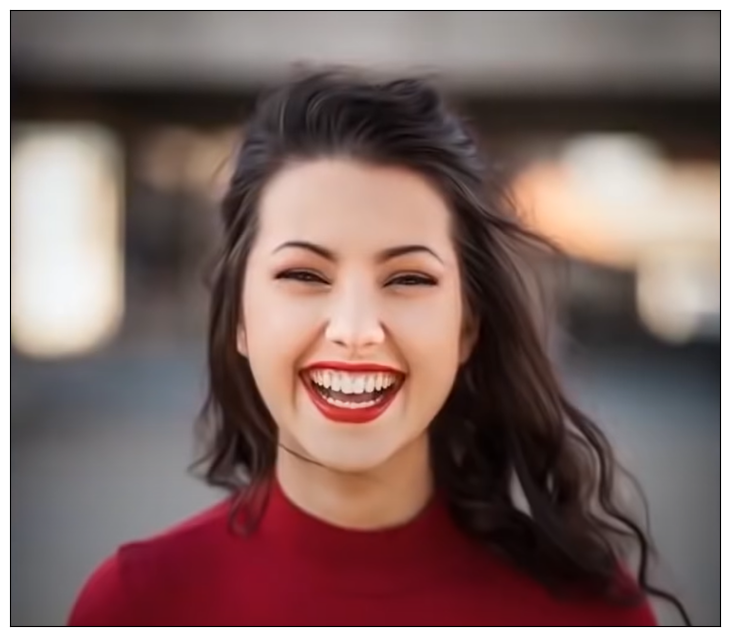

In [23]:
# Importing the basic libraries

import cv2
import glob
import numpy as np
import pytesseract
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]

import warnings
warnings.filterwarnings('ignore')
# Reading the image file

img = cv2.imread('girl1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])

plot_image(img)
plt.show()

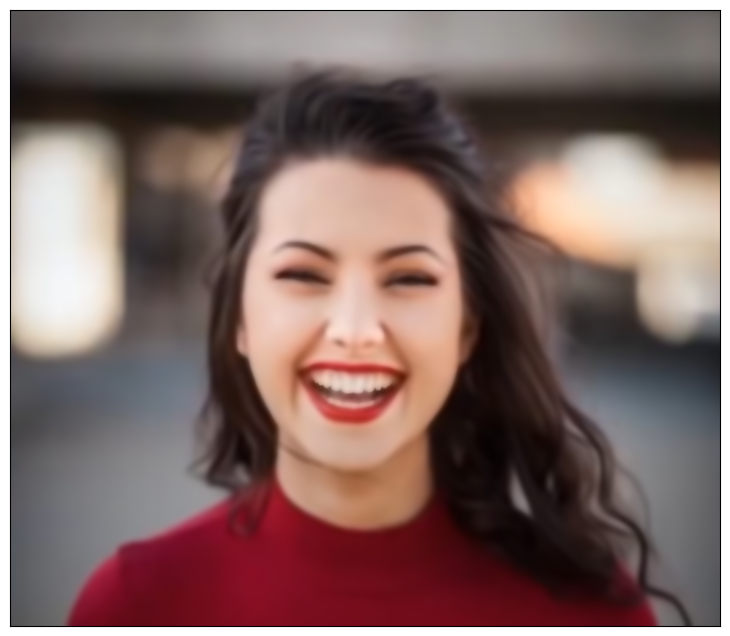

In [24]:
# Filtering Noise

def filtering_noise(image):
    return cv2.bilateralFilter(image, 15, 300, 300)

noiseless_img = filtering_noise(img)

plot_image(noiseless_img, cmap='gray')
plt.show()

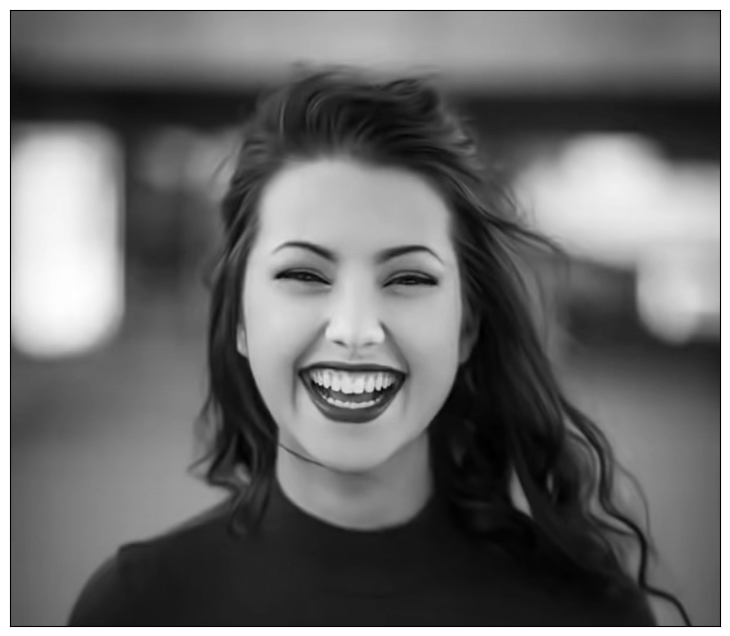

In [25]:
# Converting the image to grayscale

def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_img = get_grayscale(img)

plot_image(gray_img, cmap='gray')
plt.show()

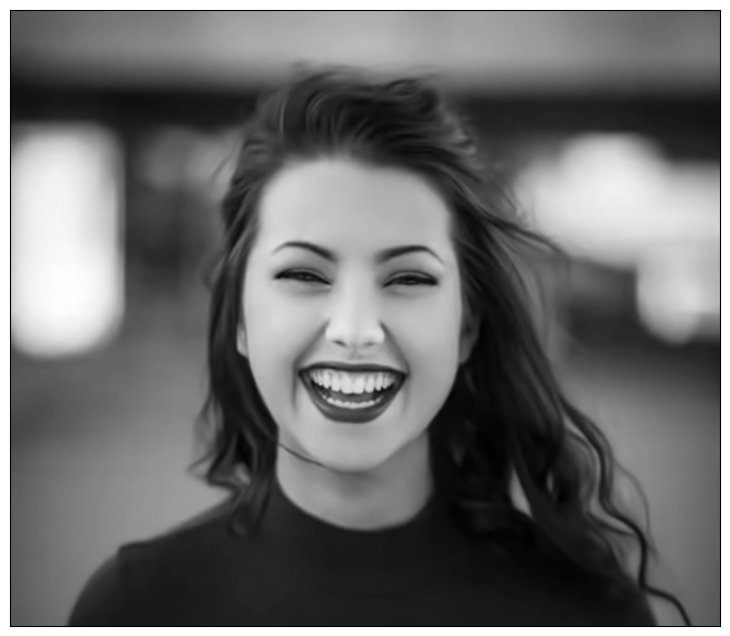

In [26]:
# Applying Gaussian Blur

def remove_noise(image):
    return cv2.GaussianBlur(gray_img,(5,5),1)

blur_img = remove_noise(gray_img)

plot_image(blur_img, cmap='gray')
plt.show()

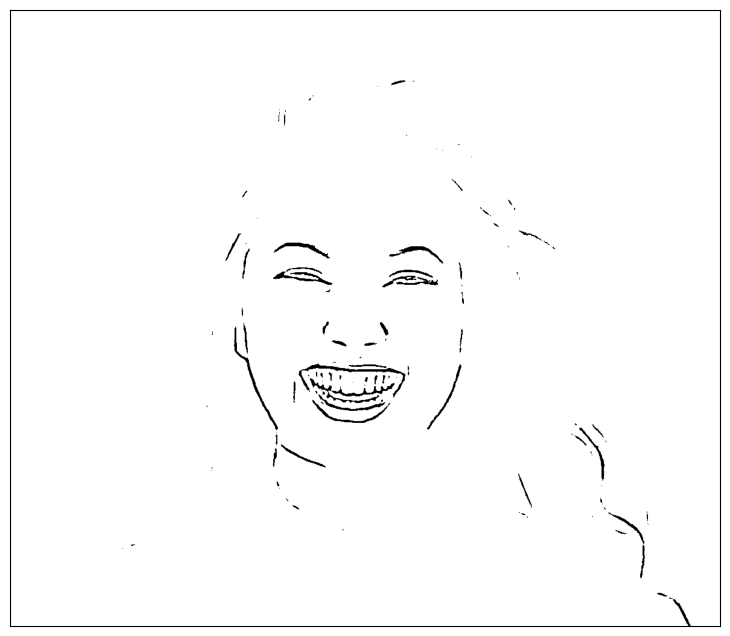

In [27]:
# Applying Thresholding

def apply_thresholding(image):
    return cv2.adaptiveThreshold(image, 255,
  cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY, 9, 9)

thresholded_img = apply_thresholding(blur_img)

plot_image(thresholded_img, cmap='gray')
plt.show()

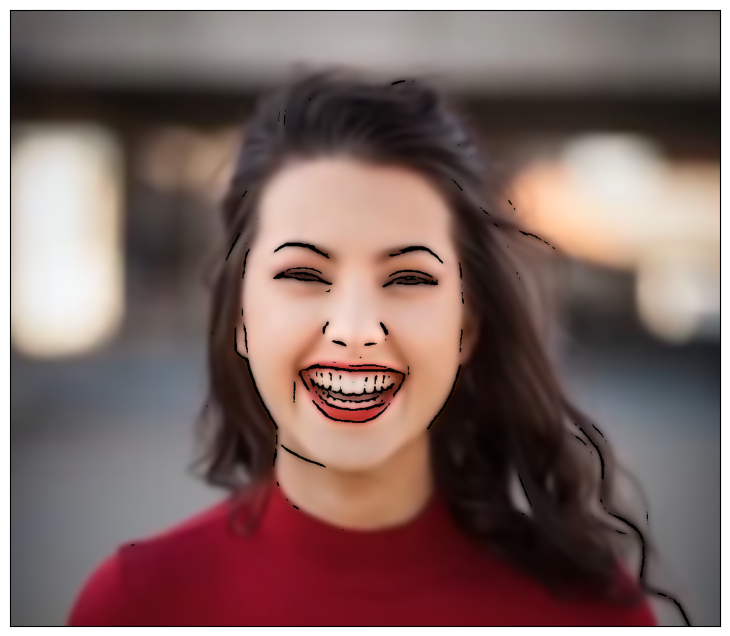

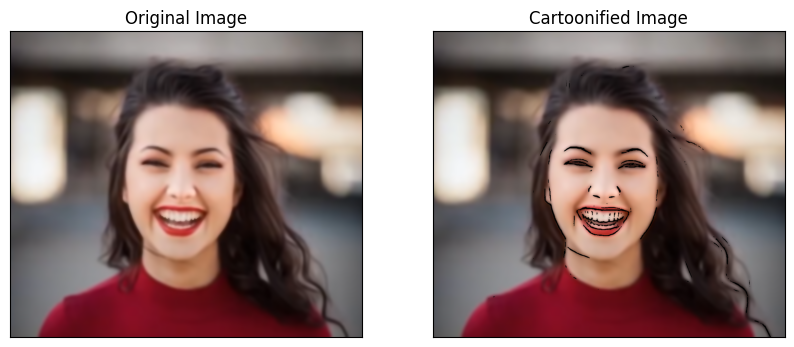

In [28]:

def cartoonify_filter(image):
    return cv2.bitwise_and(image, image, mask=thresholded_img)

cartoonify_img = cartoonify_filter(noiseless_img)

plot_image(cartoonify_img, cmap='gray')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(noiseless_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plot_image(cartoonify_img)
plt.title('Cartoonified Image')

plt.show()